# <군산 관광지별 방문객 수 비교 분석>

군산의 12개 관광지별 입장객 통계 데이터를 가져와 다양한 EDA를 진행한 결과, '선유도' 와 '실내/실외 입장객 비율 추이'에 주목하게 되었습니다.

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame as df
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', rc = {'figure.figsize':(16,8)})
matplotlib.rcParams['font.family']='Malgun Gothic'

## 광광지별 입장객수 데이터 받아와서 column명 정리

In [2]:
data = pd.read_excel("../data/주요관광지점 입장객(군산 2019 2020).xls")

In [3]:
columns1 =list(data.columns)[:6]
_2019= list(data.iloc[0][6:18])
_2020= list(data.iloc[0][19:])

In [4]:
column_labels = columns1
column_labels = columns1+_2019
column_labels.append("2020년")
column_labels = column_labels+_2020

In [5]:
np.array(data)
gunsan_visit = df(np.array(data),columns=column_labels)
gunsan_visit.drop(0,inplace=True)
gunsan_visit.dropna(inplace=True)
gunsan_visit

,시도,군구,관광지,내/외국인,총계(2019.01 ~ 2020.12),2019년,2019년 01월,2019년 02월,2019년 03월,2019년 04월,...,2020년 03월,2020년 04월,2020년 05월,2020년 06월,2020년 07월,2020년 08월,2020년 09월,2020년 10월,2020년 11월,2020년 12월
1,전라북도,군산시,경암동철길마을,내국인,1062559.0,727776,70059,92745,82779,72189,...,20327,27684,41132,24526,25118,39742,15964,38190,28164,15035
2,전라북도,군산시,경암동철길마을,합계,1062559.0,727776,70059,92745,82779,72189,...,20327,27684,41132,24526,25118,39742,15964,38190,28164,15035
3,전라북도,군산시,군산근대역사박물관,내국인,983716.0,779876,49674,71169,63822,96827,...,0,0,18561,19018,16230,40053,0,19814,23638,3158
4,전라북도,군산시,군산근대역사박물관,외국인,3867.0,3867,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,전라북도,군산시,군산근대역사박물관,합계,987583.0,783743,49674,71169,63822,96827,...,0,0,18561,19018,16230,40053,0,19814,23638,3158
6,전라북도,군산시,군산새만금오토캠핑장,내국인,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,전라북도,군산시,군산새만금오토캠핑장,외국인,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,전라북도,군산시,군산새만금오토캠핑장,합계,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,전라북도,군산시,군산새만금컨벤션센터,내국인,240199.0,202153,26600,6280,32226,12725,...,11,24,1571,12061,290,1544,3768,454,1212,223
10,전라북도,군산시,군산새만금컨벤션센터,외국인,1250.0,1230,100,0,100,70,...,0,0,0,0,0,0,0,0,0,0


### 관광지별 월별 입장객(내/외국인) Pivot Table

#### multi index(내국인, 외국인, 합계), multi column(2019년, 2020년)

In [6]:
table2 = pd.pivot_table(gunsan_visit, values=['2019년 01월',
 '2019년 02월',
 '2019년 03월',
 '2019년 04월',
 '2019년 05월',
 '2019년 06월',
 '2019년 07월',
 '2019년 08월',
 '2019년 09월',
 '2019년 10월',
 '2019년 11월',
 '2019년 12월',
 '2020년 01월',
 '2020년 02월',
 '2020년 03월',
 '2020년 04월',
 '2020년 05월',
 '2020년 06월',
 '2020년 07월',
 '2020년 08월',
 '2020년 09월',
 '2020년 10월',
 '2020년 11월',
 '2020년 12월'], index=[ '관광지', '내/외국인'], aggfunc=np.sum)

### 오토캠핑장 제거(NA)

In [7]:
table2.drop(index='군산새만금오토캠핑장',inplace=True)

In [8]:
#emp = emp.set_index('고용형태')  # 고용형태 컬럼을 인덱스로 사용
s1 = table2.columns.map(lambda x : x[:5])
s1

Index(['2019년', '2019년', '2019년', '2019년', '2019년', '2019년', '2019년', '2019년',
       '2019년', '2019년', '2019년', '2019년', '2020년', '2020년', '2020년', '2020년',
       '2020년', '2020년', '2020년', '2020년', '2020년', '2020년', '2020년', '2020년'],
      dtype='object')

In [9]:
s2 = table2.columns.map(lambda x : x[6:])
s2

Index(['01월', '02월', '03월', '04월', '05월', '06월', '07월', '08월', '09월', '10월',
       '11월', '12월', '01월', '02월', '03월', '04월', '05월', '06월', '07월', '08월',
       '09월', '10월', '11월', '12월'],
      dtype='object')

In [10]:
table2.columns = [s1, s2]              # 컬럼 지정
table2.columns.names = ['년도', '월']   # 컬럼 이름 설정
table2

년도                 2019년                                                  \
월                    01월     02월     03월     04월     05월     06월     07월   
관광지        내/외국인                                                           
경암동철길마을    내국인     70059   92745   82779   72189   83010   63336   69000   
           합계      70059   92745   82779   72189   83010   63336   69000   
군산근대역사박물관  내국인     49674   71169   63822   96827   93072   49269   53125   
           외국인         0       0       0       0       0       0       0   
           합계      49674   71169   63822   96827   93072   49269   53125   
군산새만금컨벤션센터 내국인     26600    6280   32226   12725   22035    8715    6350   
           외국인       100       0     100      70     100     320      80   
           합계      26700    6280   32326   12795   22135    9035    6430   
군산컨트리클럽    내국인      2256    4265   13627   16800   24716   21400   13500   
           외국인         0       0       0       0       0       0       0   
           합계       2256    4265   13627   16800   24716   21400   13500   
금강철새조망대    내국인      3365    2906    2269    3142    2419    2274    3652   
           외국인         0       0       0       0       0       0       0   
           합계       3365    2906    2269    3142    2419    2274    3652   
선유도        내국인    185083  201783  172785  234173  310276  238924  213253   
           합계     185083  201783  172785  234173  310276  238924  213253   
은파호수공원     내국인     32336   35484   42726   96877   65943   65589   61414   
           합계      32336   35484   42726   96877   65943   65589   61414   
청암산        내국인     15588   11743   16337    8023    6744   11280    9828   
           합계      15588   11743   16337    8023    6744   11280    9828   
청암산 오토캠핑장  내국인         0       0       0       0       0       0    1360   
           외국인         0       0       0       0       0       0       0   
           합계          0       0       0       0       0       0    1360   
초원사진관      내국인     22018   27455   21435   21068   23191   28240   25162   
           합계      22018   27455   21435   21068   23191   28240   25162   
테디베어박물관    내국인      4437    4719    3518    2302    3277    3001    3183   
           외국인         0       0       0       0       0       0       0   
           합계       4437    4719    3518    2302    3277    3001    3183   

년도                                        ...   2020년                          \
월                    08월     09월     10월  ...     03월     04월     05월     06월   
관광지        내/외국인                          ...                                   
경암동철길마을    내국인     30535   25983   54741  ...   20327   27684   41132   24526   
           합계      30535   25983   54741  ...   20327   27684   41132   24526   
군산근대역사박물관  내국인     92106   41163   73618  ...       0       0   18561   19018   
           외국인        11      36     208  ...       0       0       0       0   
           합계      92117   41199   73826  ...       0       0   18561   19018   
군산새만금컨벤션센터 내국인      5435   40065   26400  ...      11      24    1571   12061   
           외국인        20     240     120  ...       0       0       0       0   
           합계       5455   40305   26520  ...      11      24    1571   12061   
군산컨트리클럽    내국인     14000   15000   26000  ...    9505   13784   23275   22452   
           외국인         0       0       0  ...       0       0       0       0   
           합계      14000   15000   26000  ...    9505   13784   23275   22452   
금강철새조망대    내국인      8455    4688    7550  ...       0       0    1000     914   
           외국인         0       0       0  ...       0       0       0       0   
           합계       8455    4688    7550  ...       0       0    1000     914   
선유도        내국인    391772  248423  385537  ...  151869  299975  263736  257477   
           합계     391772  248423  385537  ...  151869  299975  263736  257477   
은파호수공원     내국인     63707   55184   65222  ...   67358   77453   73145   57462   
           합계      6370

In [11]:
index_list=list(table2.index)

# 시각화

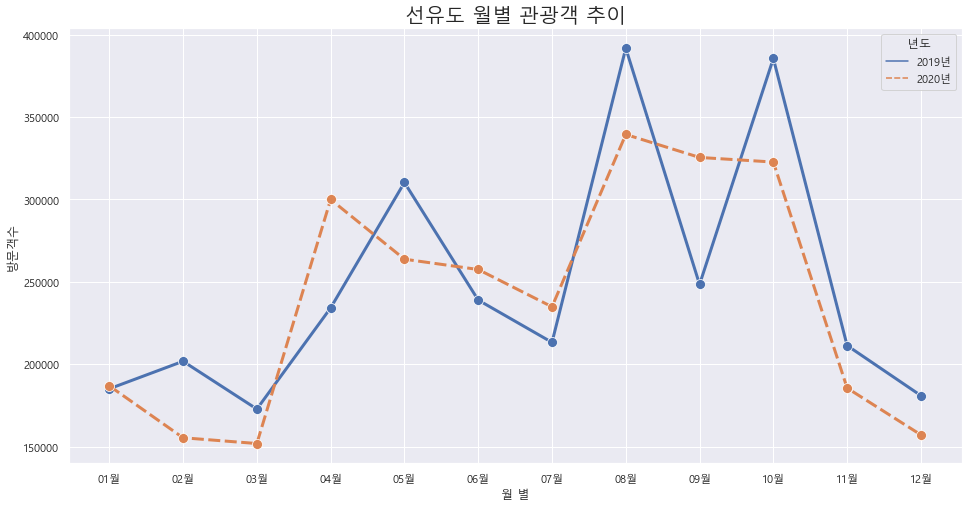

In [18]:
p = sns.lineplot(data=table2.xs(('선유도', '합계')).unstack().T, linestyle='-',marker='o',linewidth = 3,markersize=10)
p.set_ylabel("방문객수")
p.set_xlabel("월 별")
p.set_title("선유도 월별 관광객 추이", fontsize = 20)
plt.show()

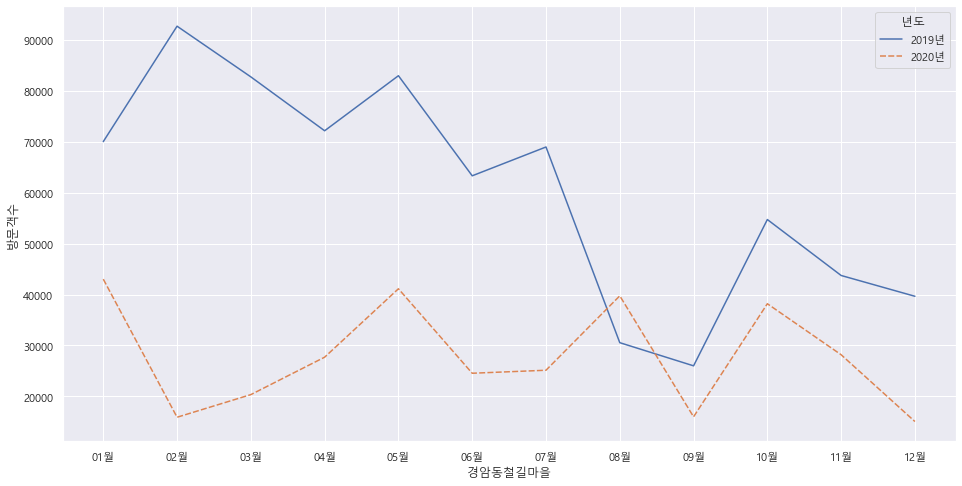

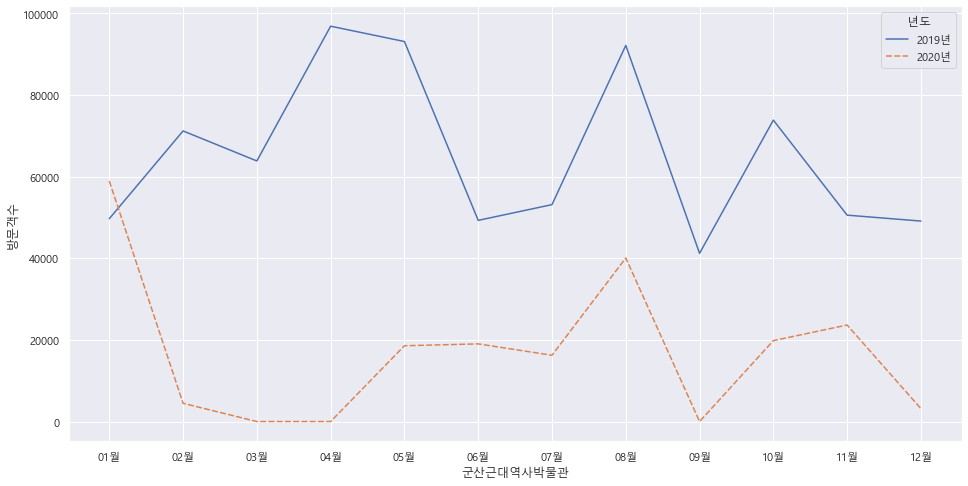

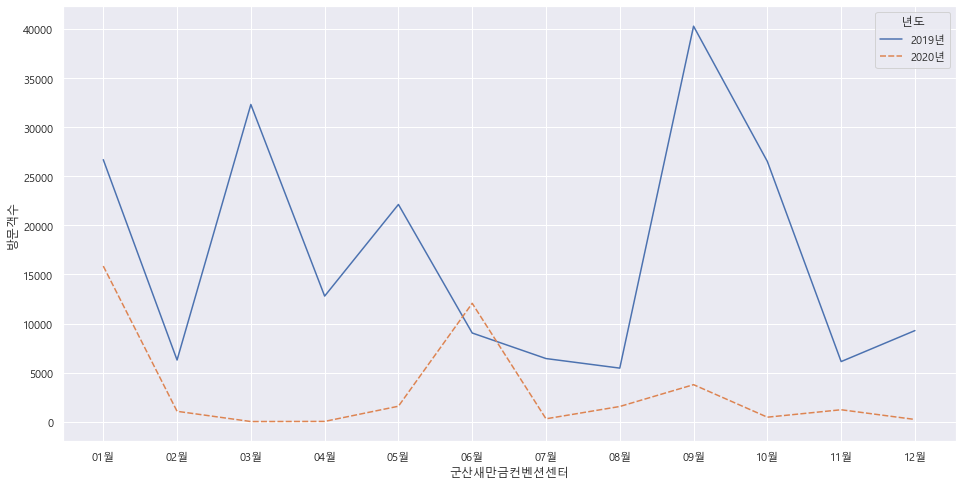

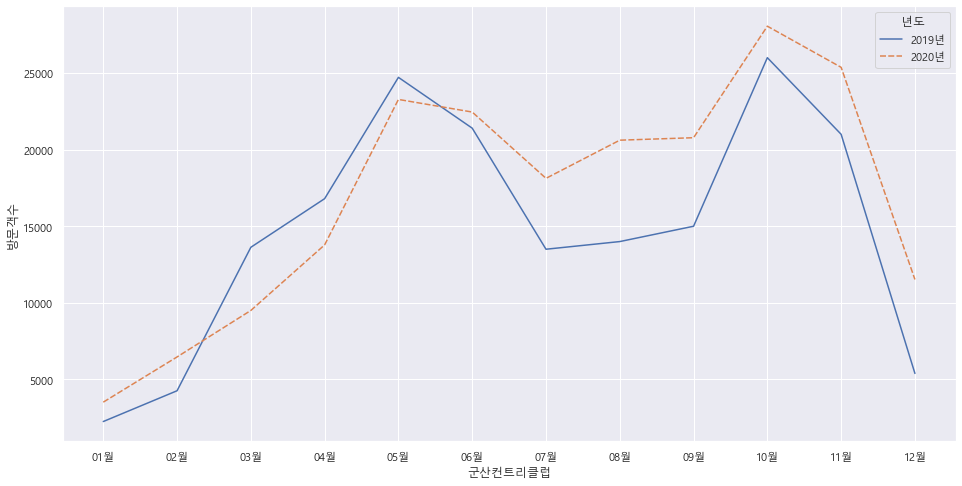

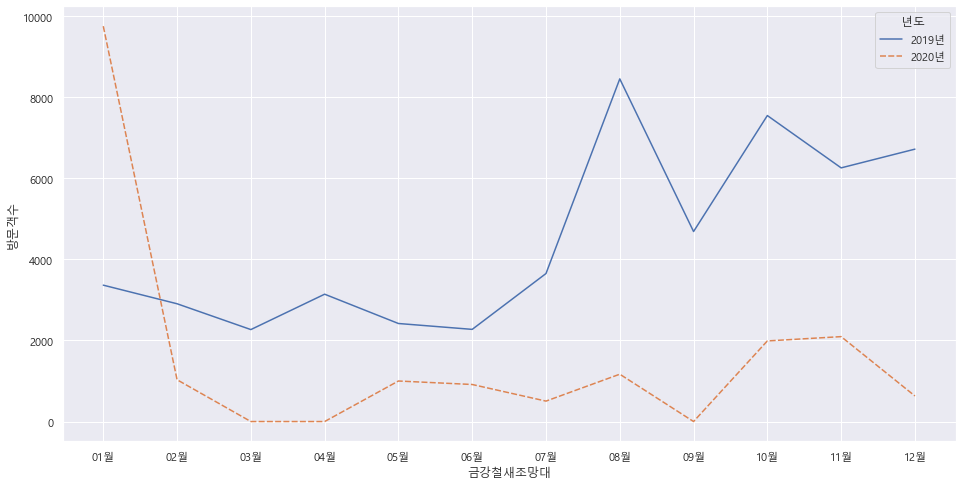

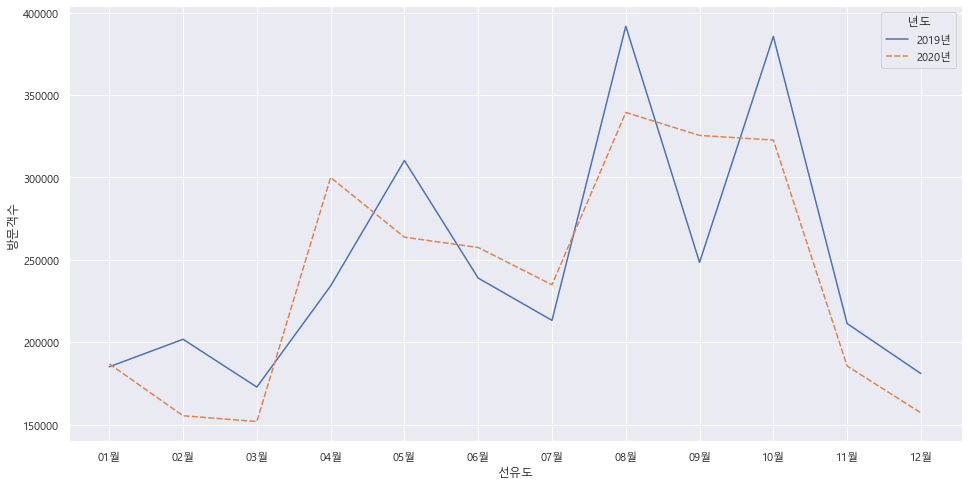

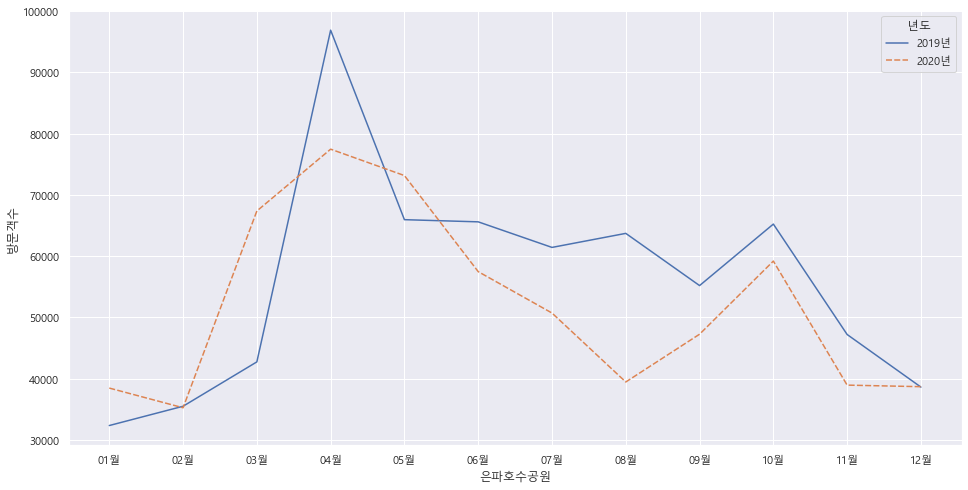

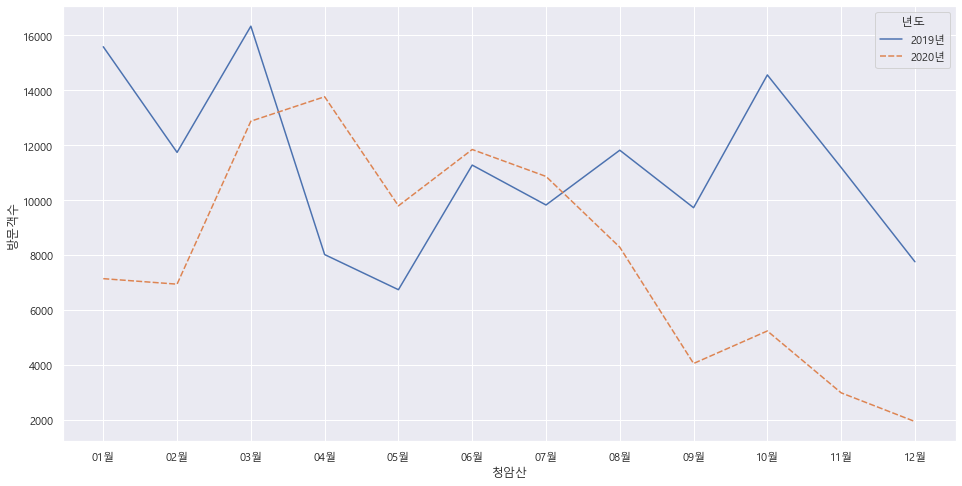

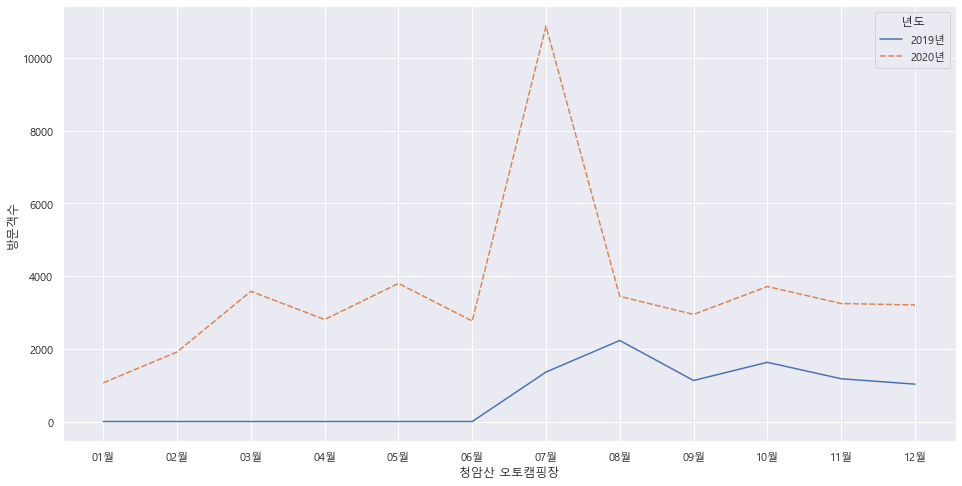

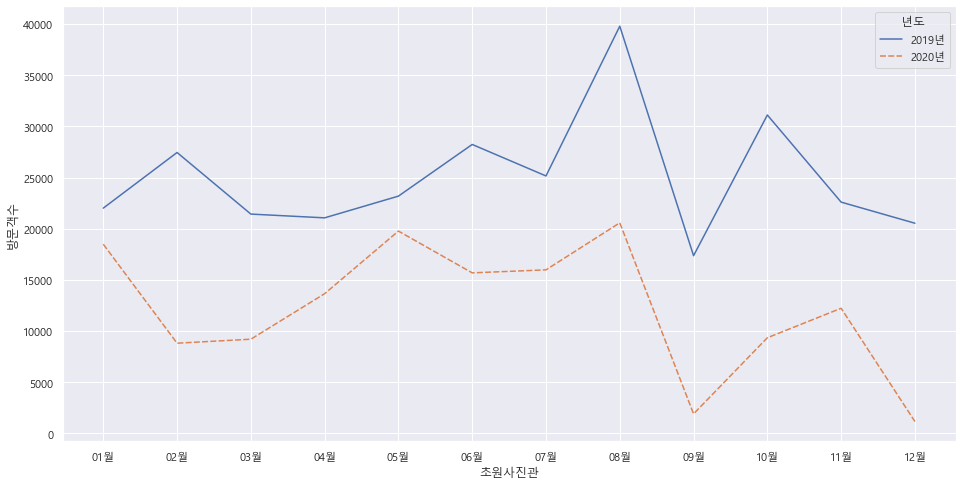

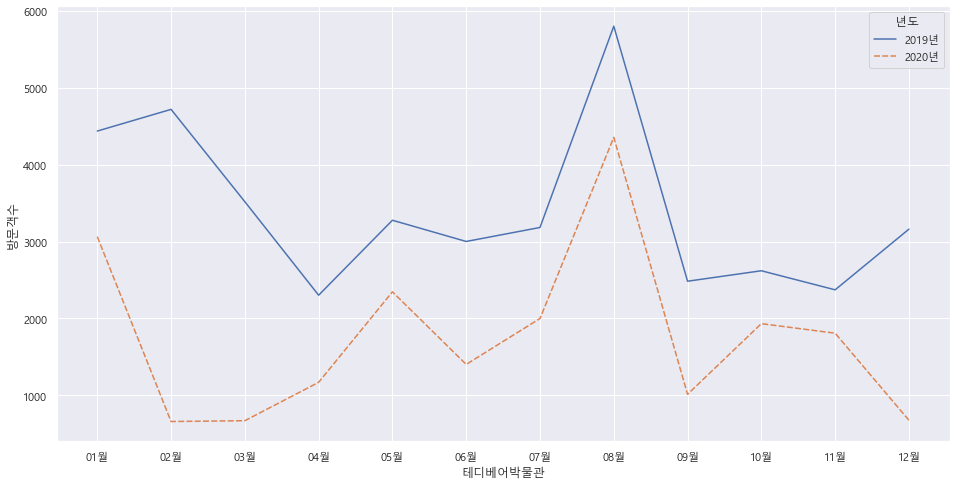

In [13]:
for indexes in index_list:
    if indexes[1]=='합계':
        p = sns.lineplot(data=table2.xs(indexes).unstack().T)
        p.set_ylabel("방문객수")
        p.set_xlabel(indexes[0])
        plt.show()

## 관광지별 전체 합계 차이. 2019, 2020

In [14]:
table3 = pd.pivot_table(gunsan_visit, values=['2019년','2020년'], index=[ '관광지', '내/외국인'], aggfunc=np.sum)
table3.drop(index='군산새만금오토캠핑장',inplace=True)

### 관광지별 관광객 수 (내/ 외국인) 시각화

In [15]:
loc_pre = table3.unstack().fillna(0)
loc_pre.drop(columns='합계', level=1, inplace=True)
loc_pre['2019년']

내/외국인,내국인,외국인
관광지,,
경암동철길마을,727776.0,0.0
군산근대역사박물관,779876.0,3867.0
군산새만금컨벤션센터,202153.0,1230.0
군산컨트리클럽,177959.0,0.0
금강철새조망대,53700.0,0.0
선유도,2974290.0,0.0
은파호수공원,670290.0,0.0
청암산,134612.0,0.0
청암산 오토캠핑장,8548.0,0.0


Text(0.5, 1.0, '군산 관광지별 방문자수 비율')

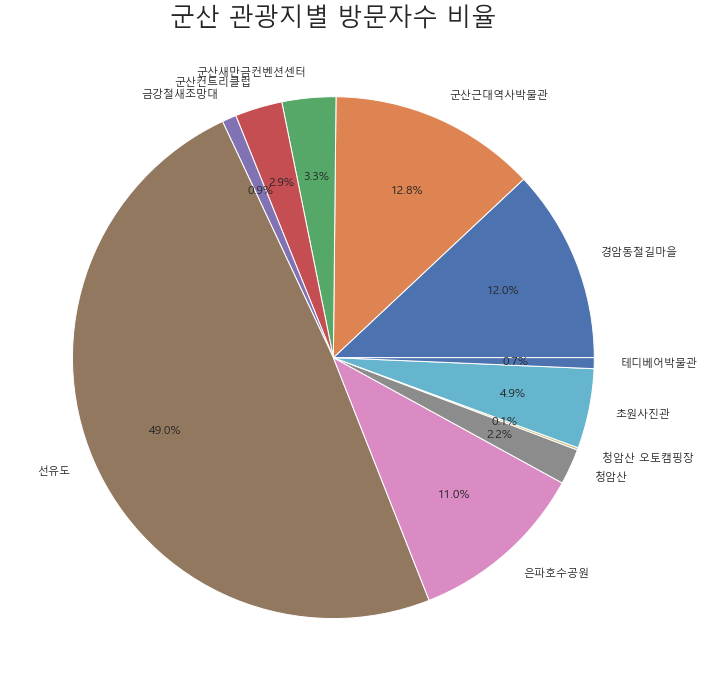

In [16]:
pie, ax = plt.subplots(figsize=[12,12])
labels = loc_pre['2019년'].index
plt.pie(x=loc_pre['2019년']['내국인'], autopct="%.1f%%", labels=labels, pctdistance=0.7)
plt.title("군산 관광지별 방문자수 비율", fontsize=25)

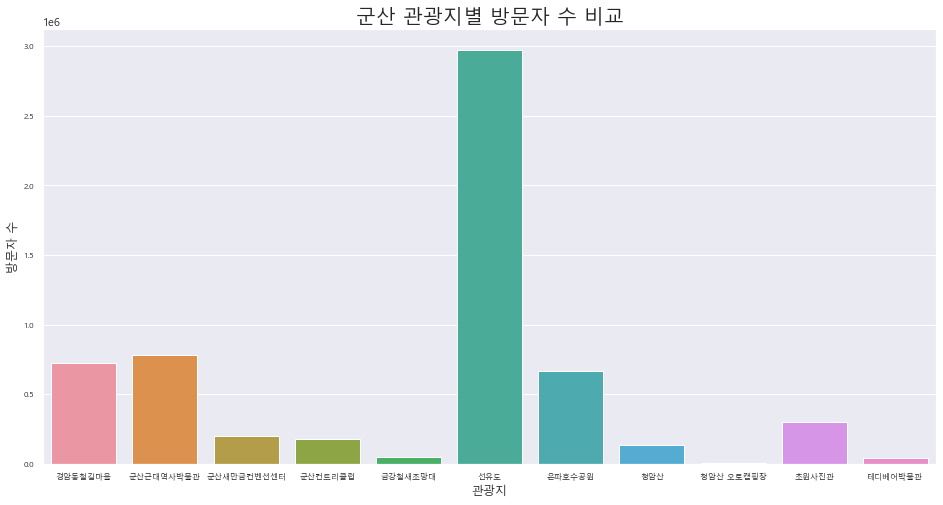

In [19]:
p = sns.barplot(
    data= loc_pre['2019년'],
    x= loc_pre['2019년'].index,
    y= '내국인'
)
p.set_title("군산 관광지별 방문자 수 비교", fontsize = 20)
p.set_ylabel("방문자 수")
p.set_xlabel("관광지")
p.tick_params(labelsize=8)
plt.show()

<AxesSubplot:xlabel='관광지'>

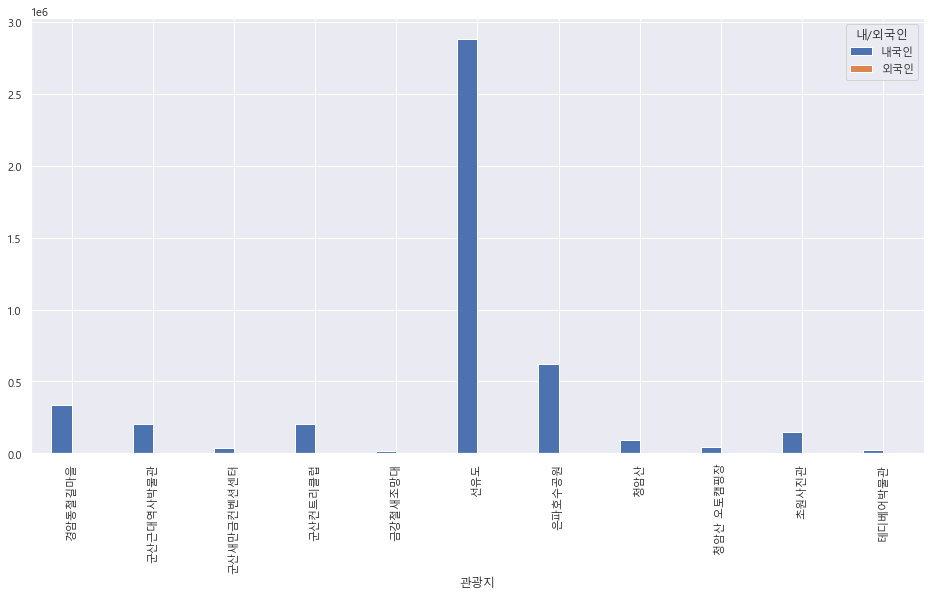

In [20]:
loc_pre['2020년'].plot(kind='bar')

## 관광지별 내/ 외국인 차이(외국인 데이터 단 두곳만 존재)

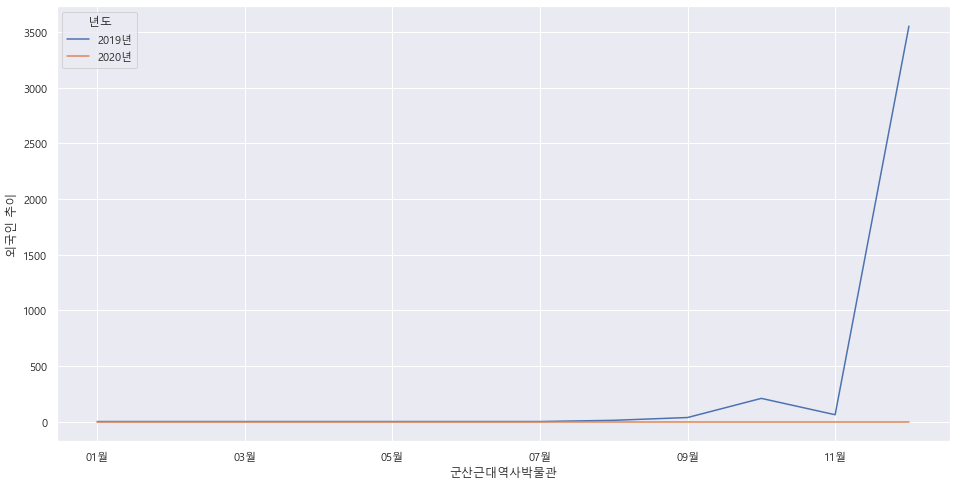

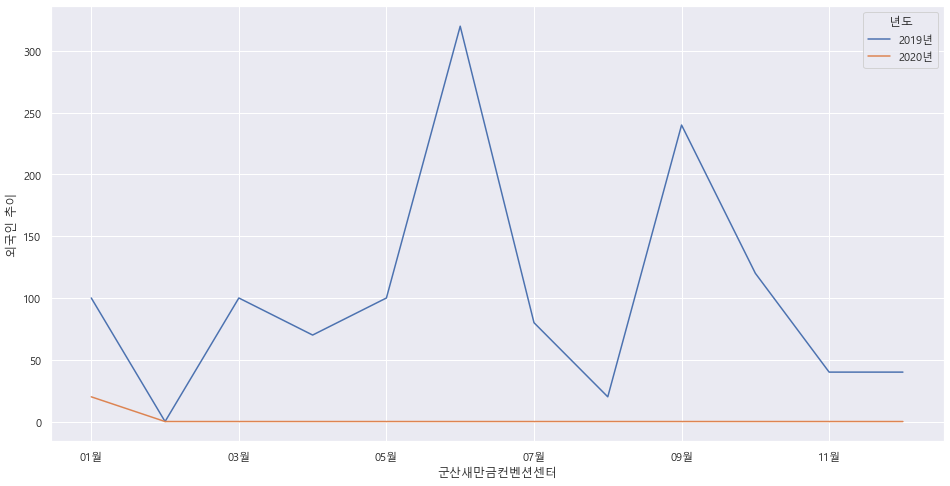

In [21]:
for indexes in index_list:
    if (indexes[0]=='군산근대역사박물관' or indexes[0]=='군산새만금컨벤션센터') and indexes[1]=='외국인' :
        #print(indexes[0])
        table2.xs(indexes).unstack().T.plot(kind='line', xlabel=indexes[0],ylabel="외국인 추이", grid=True)

## 실내/ 실외 관광지 구분해서 시각화

### 2020년 관광지 월별 합계만

In [22]:
inout20 = table2.drop(columns='2019년', level=0)
inout20 = inout20.drop(index=['내국인','외국인'], level=1)
inout20 = inout20.stack(level=0)

### 실내/ 외/ 복합 구분 추가

In [23]:
실내외구분 = ['복합','실내','실내','실외','복합','실외','실외','실외','실외','실내','실내']
inout20['실내외구분'] = 실내외구분
inout20

,,월,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월,실내외구분
관광지,내/외국인,년도,,,,,,,,,,,,,
경암동철길마을,합계,2020년,43022,15879,20327,27684,41132,24526,25118,39742,15964,38190,28164,15035,복합
군산근대역사박물관,합계,2020년,58899,4469,0,0,18561,19018,16230,40053,0,19814,23638,3158,실내
군산새만금컨벤션센터,합계,2020년,15855,1053,11,24,1571,12061,290,1544,3768,454,1212,223,실내
군산컨트리클럽,합계,2020년,3521,6471,9505,13784,23275,22452,18126,20616,20777,28055,25370,11527,실외
금강철새조망대,합계,2020년,9755,1031,0,0,1000,914,504,1168,0,1989,2095,631,복합
선유도,합계,2020년,186863,155373,151869,299975,263736,257477,234854,339415,325477,322677,185540,157135,실외
은파호수공원,합계,2020년,38452,35237,67358,77453,73145,57462,50702,39447,47244,59184,38933,38678,실외
청암산,합계,2020년,7146,6946,12879,13769,9797,11848,10868,8291,4058,5242,2990,1945,실외
청암산 오토캠핑장,합계,2020년,1064,1912,3580,2804,3796,2764,10868,3440,2944,3712,3244,3204,실외


In [24]:
pivot2 = pd.pivot_table(inout20, values=['01월',
 '02월',
 '03월',
 '04월',
 '05월',
 '06월',
 '07월',
 '08월',
 '09월',
 '10월',
 '11월',
 '12월'], index=['실내외구분'], aggfunc=np.sum)
pivot2

월,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
실내외구분,,,,,,,,,,,,
복합,52777,16910,20327,27684,42132,25440,25622,40910,15964,40179,30259,15666
실내,96308,14999,9888,14849,42251,48172,34504,66533,6690,31549,38888,5218
실외,237046,205939,245191,407785,373749,352003,325418,411209,400500,418870,256077,212489


<AxesSubplot:xlabel='월'>

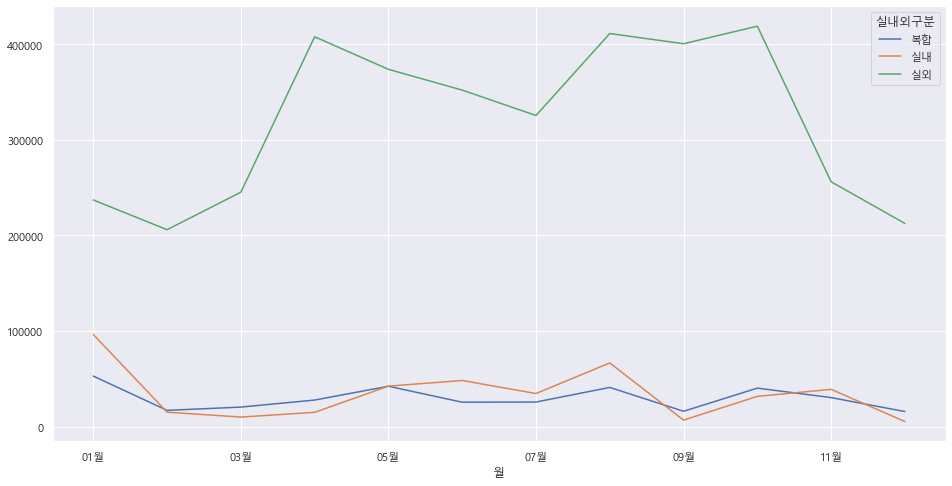

In [25]:
pivot2.T.plot()

In [ ]:
pivot2.to_csv('../data/Gunsan_Attractions_in_out2020.csv')

In [26]:
X=pivot2.T
비율 = X['실내']/X['실외']
X['실내/실외']=비율
X

실내외구분,복합,실내,실외,실내/실외
월,,,,
01월,52777,96308,237046,0.406284
02월,16910,14999,205939,0.072832
03월,20327,9888,245191,0.040328
04월,27684,14849,407785,0.036414
05월,42132,42251,373749,0.113046
06월,25440,48172,352003,0.136851
07월,25622,34504,325418,0.106030
08월,40910,66533,411209,0.161799
09월,15964,6690,400500,0.016704


<AxesSubplot:xlabel='월', ylabel='실내/실외 비율'>

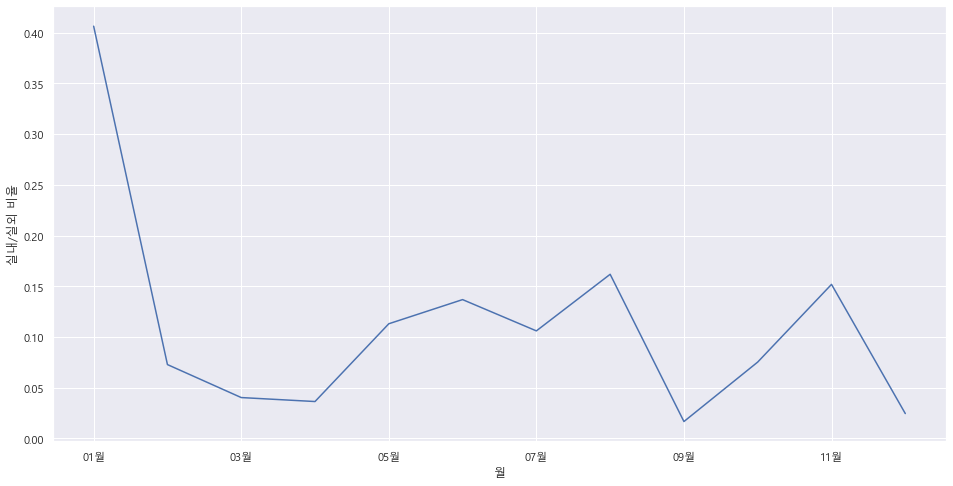

In [27]:
X['실내/실외'].plot(ylabel='실내/실외 비율')